# Part 2: BASIS FUNCTION

Write a program in python to implement the MLE that employs basis functions to solve the polynomial curve fitting problem. Follow the instructions below:

1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$
2. Add Gaussian random noise to the data

In [1]:
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
# Generate Original Curve
def Original_Curve():
    x_curve = np.linspace(0, 1, 20)
    y_curve = np.sin(np.power(x_curve, 2) + 1)
    return x_curve, y_curve

In [3]:
# Generate Initial Noisy Data
def Noisy_Data():
    x_noise = np.linspace(0, 1, 50)
    y_init_noise = np.sin(np.power(x_noise, 2) + 1)
    return x_noise, y_init_noise

In [4]:
# Add Noise
def Add_Noise(mu, sigma, y):
    noise = np.random.normal(mu, sigma, 50)
    y_noise = y + noise
    return y_noise

In [5]:
mu = 0
sigma = 0.03

In [6]:
def Generate_Initial_State():
    x_curve, y_curve = Original_Curve()
    x_noise, y_init_noise = Noisy_Data()
    y_noise = Add_Noise(mu, sigma, y_init_noise)
    return x_curve, y_curve, x_noise, y_noise

x_curve, y_curve, x_noise, y_noise = Generate_Initial_State()

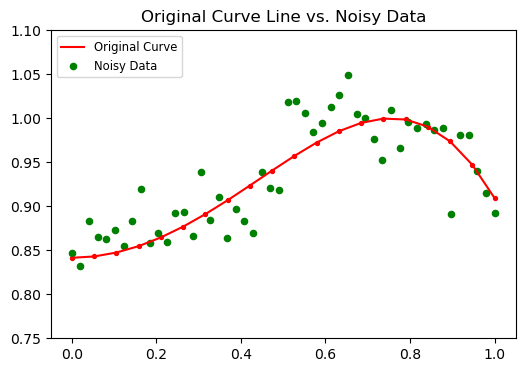

In [7]:
# Show the Original Curve Line and the Noisy Data.
plt.figure(figsize=(6, 4))
plt.plot(x_curve, y_curve, label='Original Curve', color='red')
plt.scatter(x_curve, y_curve, color='red', marker='o', s=8)
plt.scatter(x_noise, y_noise, label='Noisy Data', color='green', marker='o', s=20)
plt.title('Original Curve Line vs. Noisy Data')
plt.xlim(-0.05, 1.05)
plt.ylim(0.75, 1.10)
plt.legend(loc='upper left', fontsize='small')
plt.show()

For Gaussian/Radial Basis Function, $\phi_{m}(X_n)=\frac{1}{\sigma\sqrt{2\pi}}exp[-\frac{(X_n-\mu_m)^2}{2S^2}]$. Only the exponential part is taken here.  
For Sigmoid Basis Function, $\phi_{m}(X_n)=sigmoid(\frac{X_n-\mu_m}{S})=\sigma(\frac{X_n-\mu_m}{S})$, $sigmoid(a)=\sigma(a)=\frac{1}{1+exp(-a)}$  
$\mu_{m}$ and $S$ are hyperparameters.

In [8]:
# Choice=0, Gaussian/Radial Basis Function
# Choice=1, Sigmoid Basis Function
def Basis_Function(Choice, x, mu, s):
    if Choice == 0:
        return np.exp(-(np.power(x - mu, 2) / (2 * np.power(s, 2))))
    if Choice == 1:
        a = (x - mu) / s
        return 1 / (1 + np.exp(-a))

3. Fit the generated noisy data using the MLE that employs the ***Gaussian basis functions*** as discussed in class.
4. Show your results for different values of M that generate overfitting and underfitting curves.

<center>$\bar{w}_{MLE}=(\Phi^{T}\Phi)^{-1}\Phi^{T}\bar{t}$</center>

In [9]:
# Generate Underfitting Curves
M = 3
s = 1
delta = 0.5
Mu = [(delta * i) for i in range(M)]
Choice = 0  # Radial Basis Function

In [10]:
# Parameters Needed to Calculate the MLE
def Parameters_for_MLE(x, y, Choice, M, Mu, s):
    Phi_Matrix = np.array([1 if j == 0 else Basis_Function(Choice, x[i], Mu[j], s) for i in range(50) for j in range(M)]).reshape(50, M)
    t_bar = y
    return Phi_Matrix, t_bar

In [11]:
# Calculation for MLE
def MLE_Calculation(Phi_Matrix, t_bar):
    w_bar = np.squeeze(np.dot(np.linalg.pinv(Phi_Matrix), t_bar))
    return w_bar

In [12]:
# Generate Estimated Values
def Estimated_Curve(Phi_Matrix, w_bar):
    y_bar = np.dot(Phi_Matrix, w_bar)
    return y_bar

In [13]:
def MLE_Regression(x_noise, y_noise, Choice, M, Mu, s):
    Phi_Matrix, t_bar = Parameters_for_MLE(x_noise, y_noise, Choice, M, Mu, s)
    w_bar = MLE_Calculation(Phi_Matrix, t_bar)
    y_bar = Estimated_Curve(Phi_Matrix, w_bar)
    return w_bar, y_bar, t_bar

In [14]:
def Plot_Curves():
    # Show the Original Curve Line and the Noisy Data.
    plt.plot(x_curve, y_curve, label='Original Curve', color='red')
    plt.scatter(x_curve, y_curve, color='red', marker='o', s=8)
    plt.scatter(x_noise, y_noise, label='Noisy Data', color='green', marker='o', s=20)
    
    # Show the Underfitting Estimated Curve
    plt.plot(x_noise, y_bar, label='Estimated Curve', color='blue')
    if Choice == 0:
        plt.title('MLE Regression Line employing RBF with M=%s, S=%s, $\mu_m$=%sm'%(M, s, delta), fontsize=9)
    else:
        plt.title('MLE Regression Line employing SBF with M=%s, S=%s, $\mu_m$=%sm'%(M, s, delta), fontsize=9)
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.75, 1.10)
    plt.legend(loc='upper left', fontsize='small')

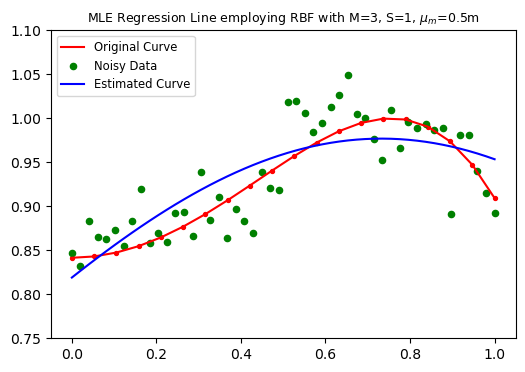

In [15]:
w_bar, y_bar, t_bar = MLE_Regression(x_noise, y_noise, Choice, M, Mu, s)

plt.figure(figsize=(6, 4))
Plot_Curves()
plt.show()

In [16]:
# Generate Overfitting Curves
M = 20
s = 0.02
delta = 0.08
Mu = [(delta * i) for i in range(M)]
Choice = 0  # Radial Basis Function

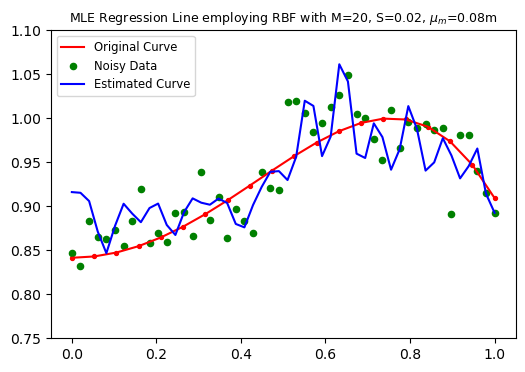

In [17]:
w_bar, y_bar, t_bar = MLE_Regression(x_noise, y_noise, Choice, M, Mu, s)

plt.figure(figsize=(6, 4))
Plot_Curves()
plt.show()

5. Change the basis functions to the ***sigmoid basis functions***, and show the results for different values of M that generate overfitting and underfitting curves.

In [18]:
# Generate Underfitting Curves
M = 3
s = 0.5
delta = 0.5
Mu = [(delta * i) for i in range(M)]
Choice = 1  # Sigmoid Basis Function

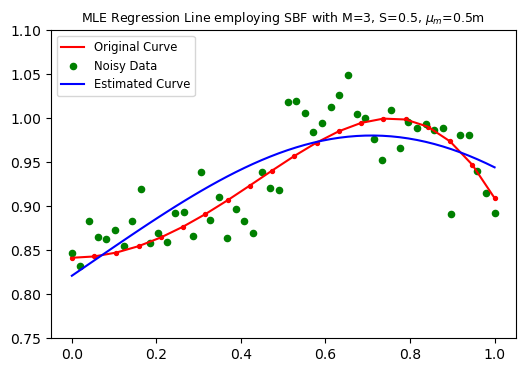

In [19]:
w_bar, y_bar, t_bar = MLE_Regression(x_noise, y_noise, Choice, M, Mu, s)

plt.figure(figsize=(6, 4))
Plot_Curves()
plt.show()

In [20]:
# Generate Underfitting Curves
M = 20
s = 0.02
delta = 0.06
Mu = [(delta * i) for i in range(M)]
Choice = 1  # Sigmoid Basis Function

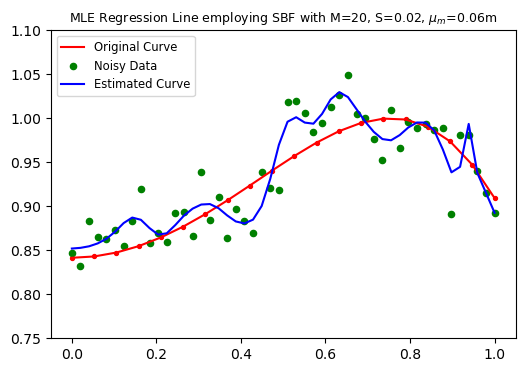

In [21]:
w_bar, y_bar, t_bar = MLE_Regression(x_noise, y_noise, Choice, M, Mu, s)

plt.figure(figsize=(6, 4))
Plot_Curves()
plt.show()

6. Change the original curve function to $y=0.4345x^3-5.607x^2+16.78x-10.61$, and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

In [22]:
def Changed_Curve():
    x = np.linspace(0, 8.5, 20)
    y = 0.4345 * np.power(x, 3) - 5.607 * np.power(x, 2) + 16.78 * x - 10.61 
    return x, y

In [23]:
def Changed_Data():
    noises = np.linspace(0, 8.5, 50)
    init_noise = 0.4345 * np.power(noises, 3) - 5.607 * np.power(noises, 2) + 16.78 * noises - 10.61
    return noises, init_noise

In [24]:
def Changed_Noise(mu, sigma, y):
    noise_value = np.random.normal(mu, sigma, 50)
    Noise = y + noise_value
    return Noise

In [25]:
def Generate_New_State():
    x, y = Changed_Curve()
    noises, init_noise = Changed_Data()
    Noise = Changed_Noise(mu, sigma, init_noise)
    return x, y, noises, Noise

In [26]:
# Use the Root Mean Square Error to Judge the Fit.
def RMSE(y, t):
    return np.sqrt(np.sum(np.power(y - t, 2)) / len(y))

In [27]:
# Generate fitted Curves Using Sigmoid Basis Function
def Test_Best_Fit(M_value, s_value, delta_value):
    Choice = 1
    RMSError = []
    for M in M_value:
        for s in s_value:
            for delta in delta_value:
                Mu = [(delta * i) for i in range(M)]
                w, y_final, t = MLE_Regression(noises, Noise, Choice, M, Mu, s)
                RMSError.append(RMSE(y_final, t))
    Best_w = np.argmin(np.array(RMSError))
    Loc = np.array([M_value[Best_w // 12], s_value[(Best_w % 12) // 4], delta_value[Best_w % 4], RMSError[Best_w]])
    return Loc

In [28]:
def Plot_Changed_Curves(M, s, delta, y_final):
    # Show the Original Curve Line and the Noisy Data.
    plt.plot(x, y, label='Original Curve', color='red')
    plt.scatter(x, y, color='red', marker='o', s=8)
    plt.scatter(noises, Noise, label='Noisy Data', color='green', marker='o', s=20)
    
    # Show the Underfitting Estimated Curve
    plt.plot(noises, y_final, label='Estimated Curve', color='blue')
    if Choice == 0:
        plt.title('MLE Regression Line employing RBF with M=%s, S=%s, $\mu_m$=%sm'%(M, s, delta), fontsize=9)
    else:
        plt.title('MLE Regression Line employing SBF with M=%s, S=%s, $\mu_m$=%sm'%(M, s, delta), fontsize=9)
    plt.xlim(-0.2, 8.7)
    plt.ylim(-30, 15)
    plt.legend(loc='upper right', fontsize='small')

In [29]:
mu = 0
sigma = 4
# To Prevent Overfitting and Underfitting, Fix the value of M to be 4, 5
M_value = np.array([4, 5])
# Set the value of s to be 5, 10 or 20
s_value = np.array([5, 10, 20])
# Set the value of delta to be 0.05, 0.2, 1, 10
delta_value = np.array([0.05, 0.2, 1, 10])

In [30]:
x, y, noises, Noise = Generate_New_State()
Loc = Test_Best_Fit(M_value, s_value, delta_value)

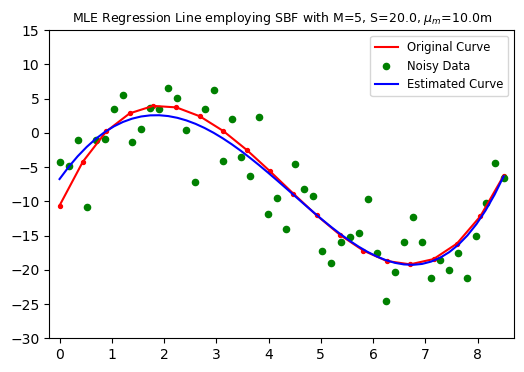

The Root Mean Square Error:  3.9047363335424663


In [31]:
M = int(Loc[0])
s = Loc[1]
delta = Loc[2]
Mu = [(delta * i) for i in range(M)]
w, y_final, t = MLE_Regression(noises, Noise, Choice, M, Mu, s)

plt.figure(figsize=(6, 4))
Plot_Changed_Curves(M, s, delta, y_final)
plt.show()
print('The Root Mean Square Error: ', Loc[3])

7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

In [32]:
# Generate fitted Curves Using Sigmoid Basis Function
# 18(3x3x2) groups were selected for comparison
def Exp_Fitting(Choice, M_value, s_value, delta_value):
    
    plt.figure(figsize=(18, 24))
    
    for i in range(len(M_value)):
        M = M_value[i]
        for j in range(len(s_value)):
            s = s_value[j]
            for k in range(len(delta_value)):
                delta = delta_value[k]
                Mu = [(delta * a) for a in range(M)]
                w, y_final, t = MLE_Regression(noises, Noise, Choice, M, Mu, s)
                count = i * (len(s_value) * len(delta_value)) + j * len(delta_value) + k + 1
                plt.subplot(6, 3, count)
                Plot_Changed_Curves(M, s, delta, y_final)
    
    plt.show()

In [33]:
M_value = np.array([2, 5, 20])
s_value = np.array([2, 5, 20])
delta_value = np.array([1, 5])

Using Gaussian/Radial Basis Functions

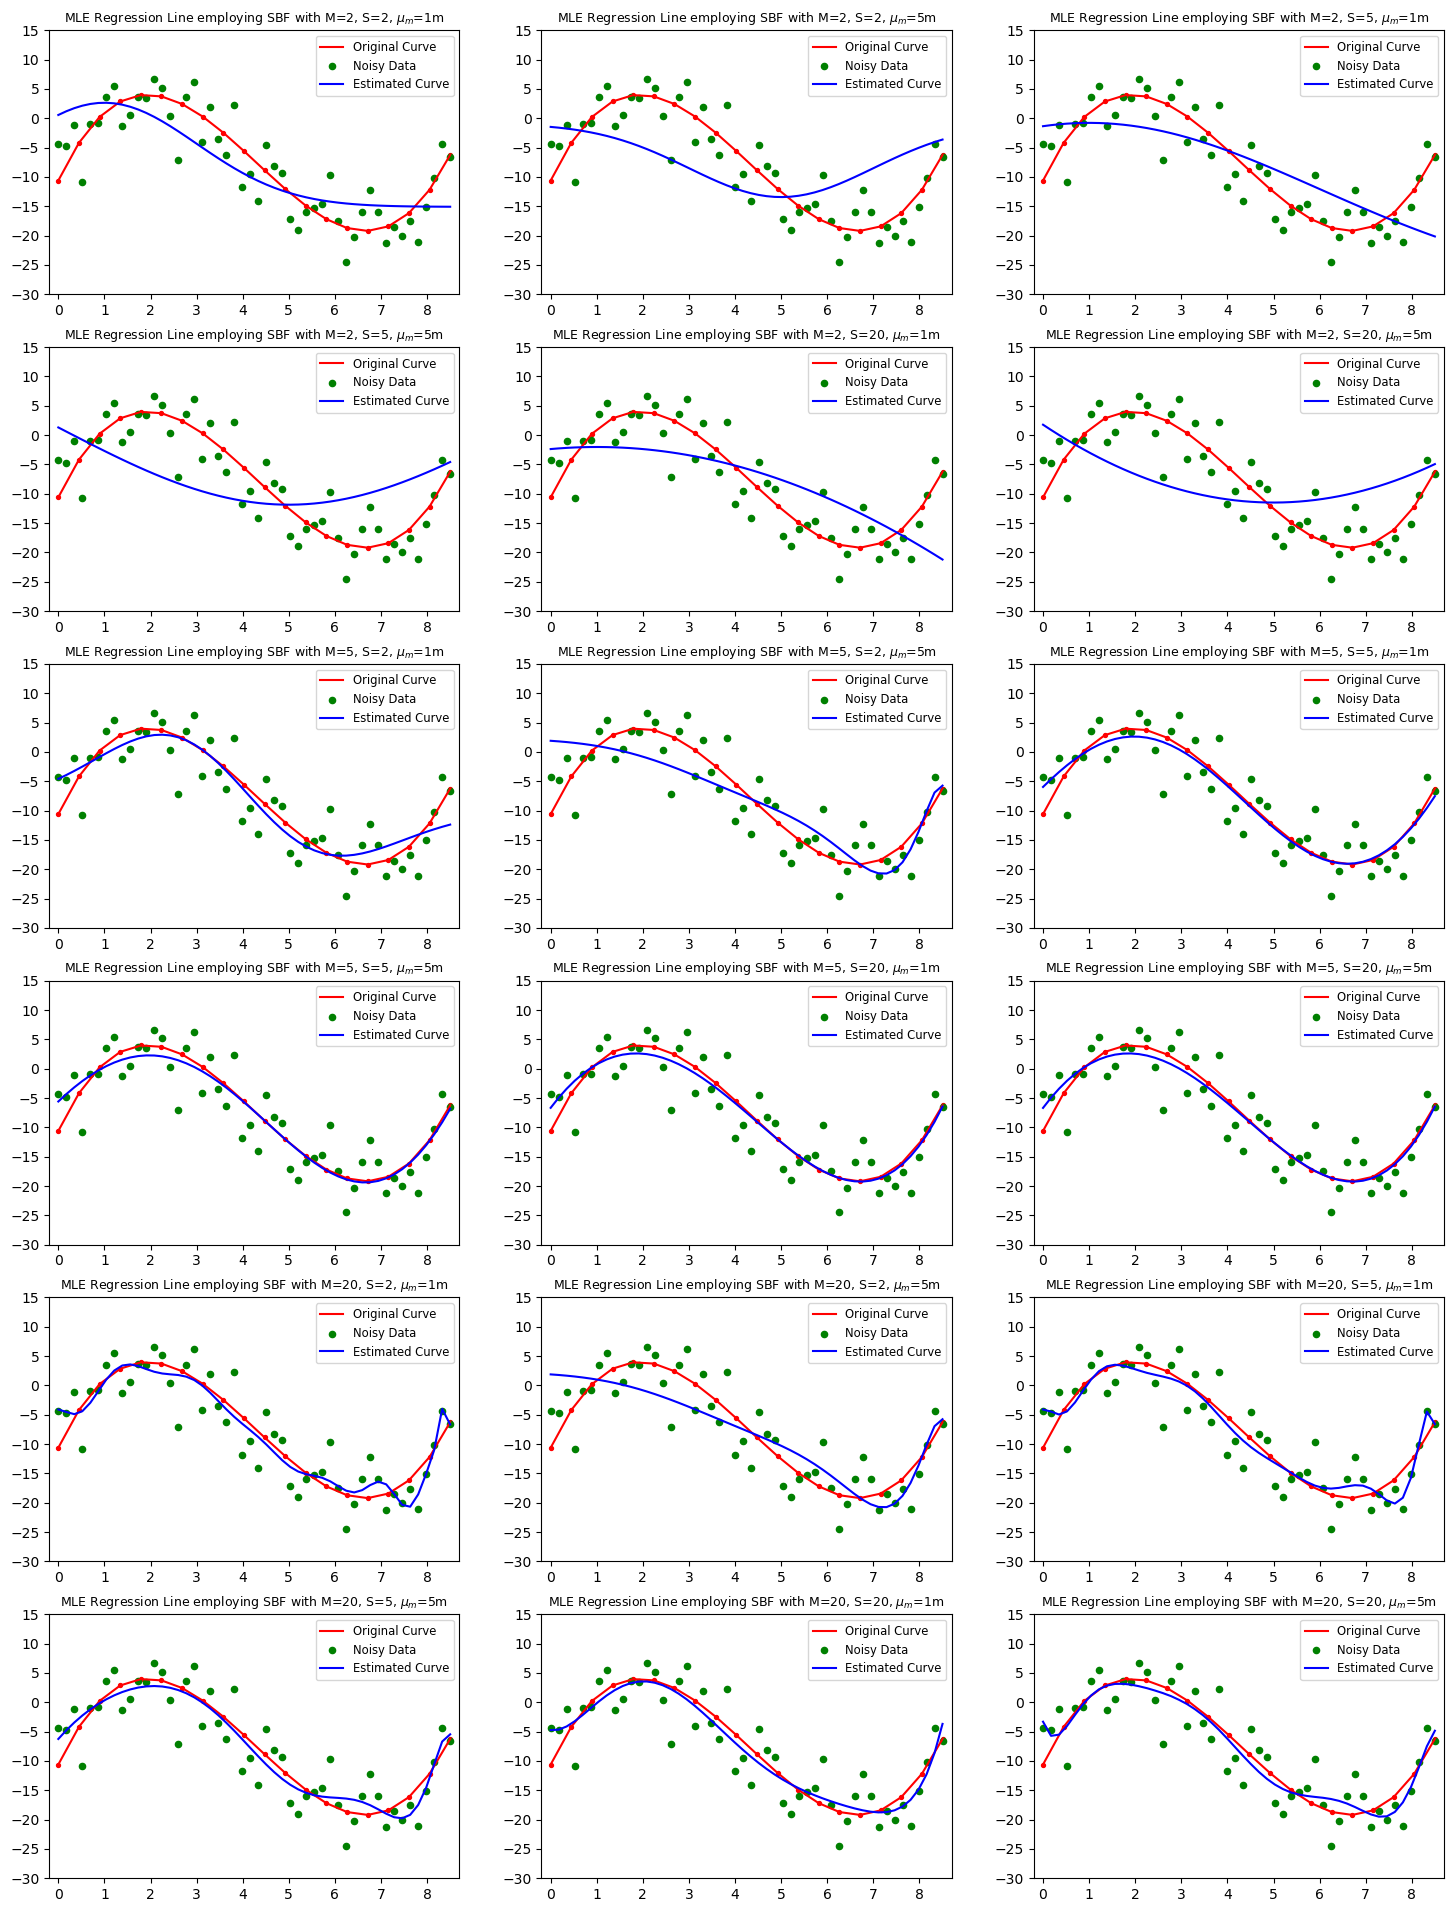

In [34]:
Exp_Fitting(0, M_value, s_value, delta_value)

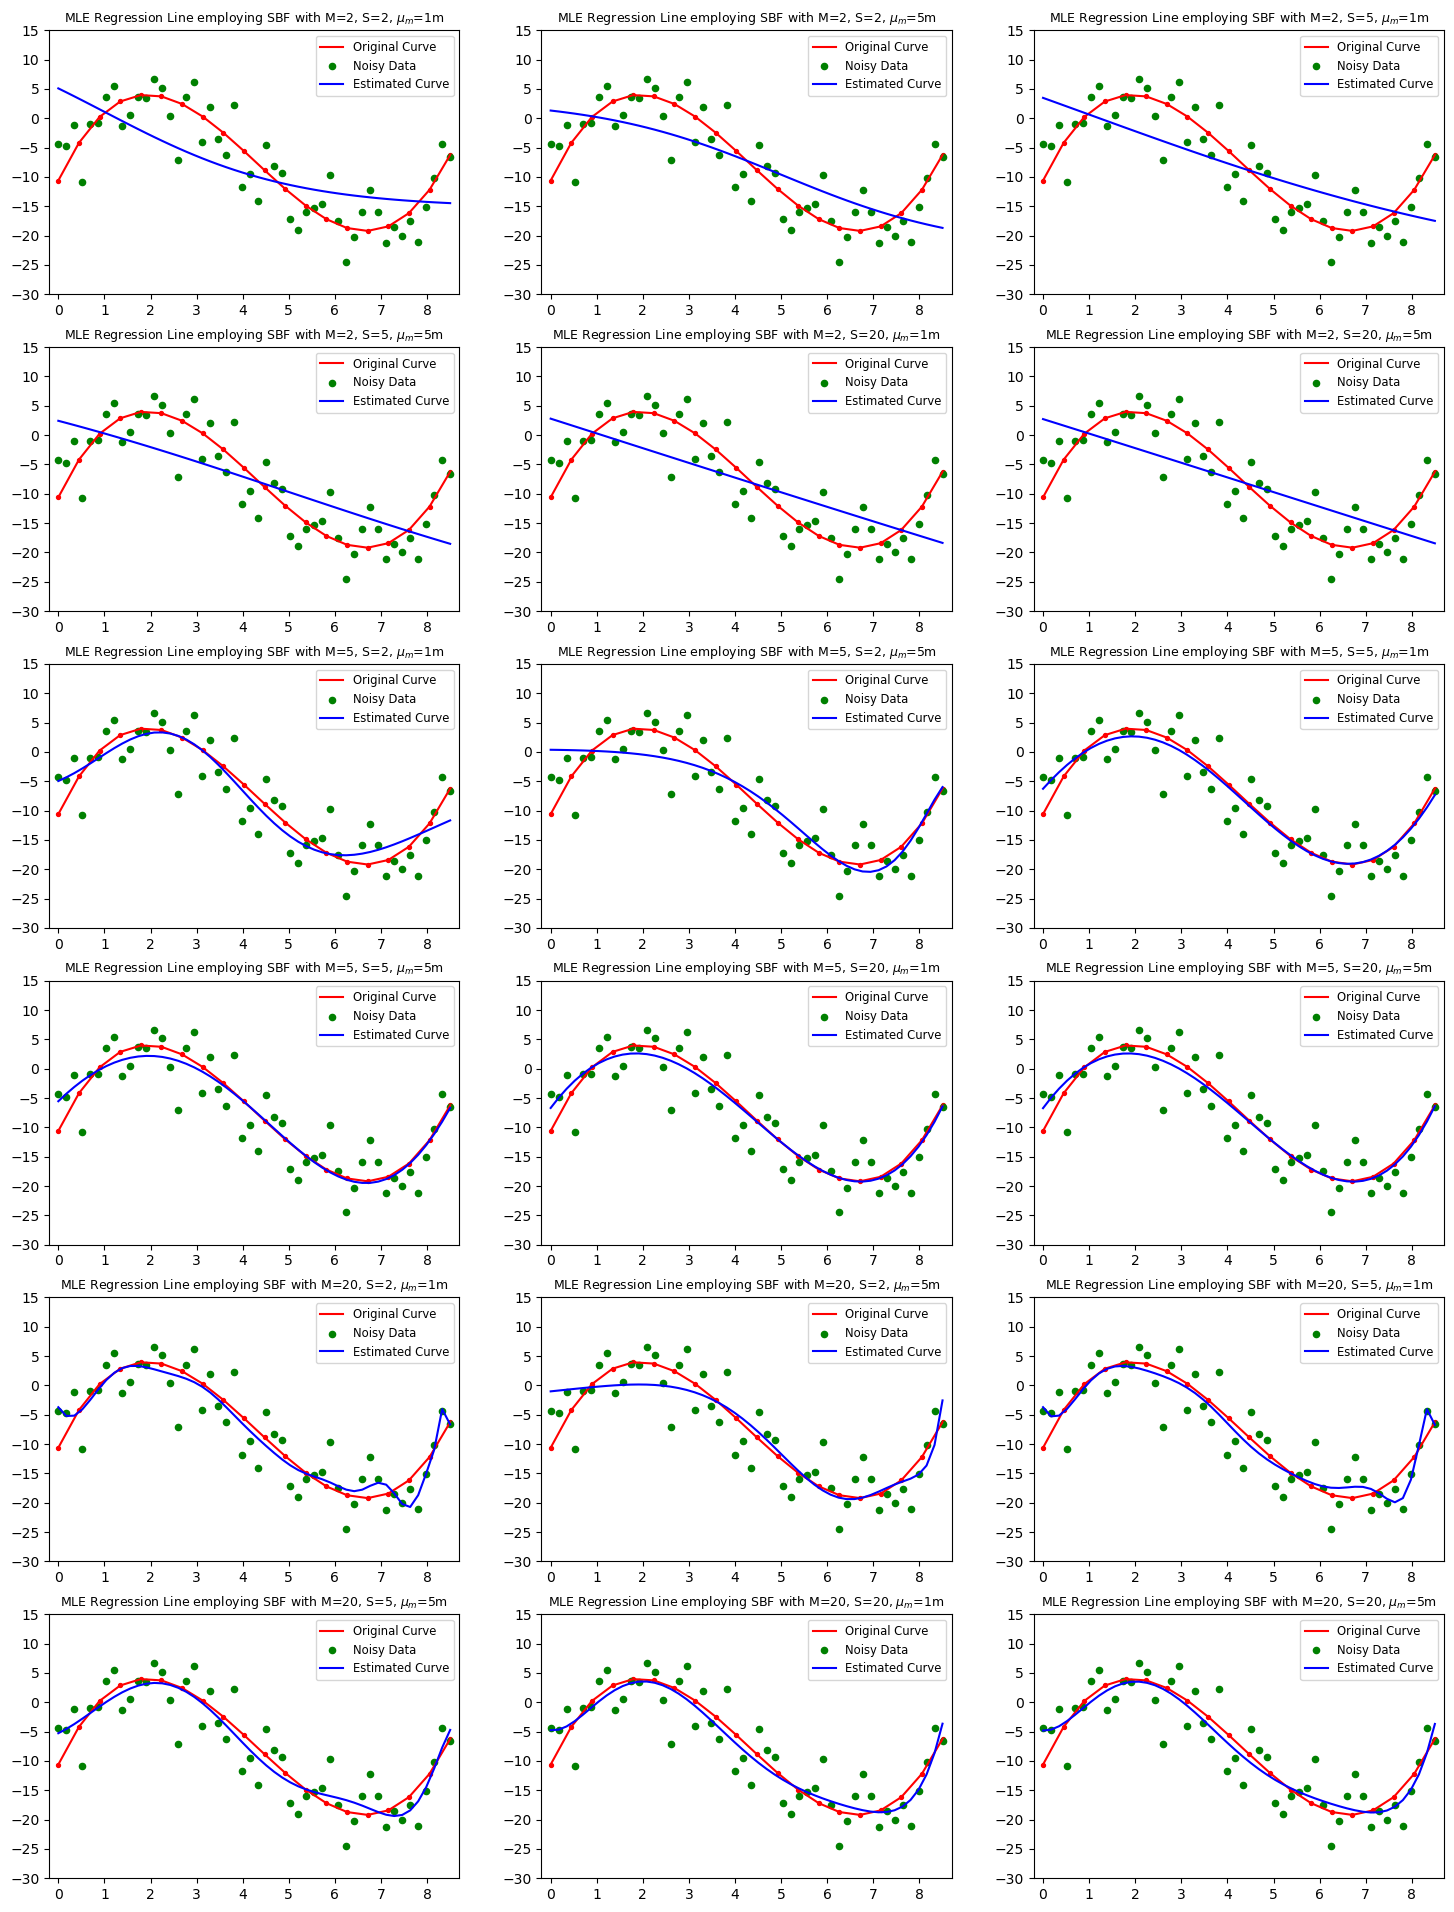

In [35]:
Exp_Fitting(1, M_value, s_value, delta_value)

Polynomial basis functions are global functions of the input variables, so that changes in one region of input space affect all other region. Using other basis functions (e.g. Gaussian/Radial Basis Functions or Sigmoid Basis Functions) can divide the input space up into regions and fit a different polynomial in each region. Otherwise, by using these basis (kernel) functions, we can convert D-dimensional inputs into M-dimensions (in general M<<D), which can reduce the computational effort to a great extent.